In [2]:
from prophet import Prophet
import pandas as pd
import plotly as plt

In [3]:
data = pd.read_csv('Downloads\MaunaLoaDailyTemps.csv')

In [4]:
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [7]:
data.drop(['MinTemp','MaxTemp','Sunrise','Sunset'],axis=1,inplace=True)

In [26]:
data.tail()

,ds,y
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0
1824,2018-12-30,46.0


In [9]:
data.isna().sum()

DATE       0
AvgTemp    4
dtype: int64

In [12]:
data.dropna(inplace=True)

In [14]:
data.isna().sum()

DATE       0
AvgTemp    0
dtype: int64

In [15]:
data.dtypes

DATE        object
AvgTemp    float64
dtype: object

In [18]:
data['DATE'] = data['DATE'].apply(lambda x: pd.to_datetime(str(x))) 

In [19]:
data

,DATE,AvgTemp
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0
...,...,...
1820,2018-12-26,40.0
1821,2018-12-27,39.0
1822,2018-12-28,40.0
1823,2018-12-29,42.0


In [20]:
data.dtypes

DATE       datetime64[ns]
AvgTemp           float64
dtype: object

In [21]:
data.columns = ['ds','y']

In [22]:
data.head(5)

,ds,y
0,2014-01-01,40.0
1,2014-01-02,43.0
2,2014-01-03,41.0
3,2014-01-04,37.0
4,2014-01-05,31.0


# Training the model

In [23]:
model = Prophet(interval_width=0.95)

In [24]:
train = model.fit(data)

13:54:06 - cmdstanpy - INFO - Chain [1] start processing
13:54:11 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
train

# Evaluate the model

In [30]:
future = train.make_future_dataframe(periods=2000,freq='D')

In [31]:
prediction = train.predict(future)

In [32]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,44.452020,33.766768,46.784415,44.452020,44.452020,-4.087811,-4.087811,-4.087811,-0.070926,-0.070926,-0.070926,-4.016885,-4.016885,-4.016885,0.0,0.0,0.0,40.364209
1,2014-01-02,44.461990,34.220882,46.830523,44.461990,44.461990,-3.851588,-3.851588,-3.851588,0.045660,0.045660,0.045660,-3.897248,-3.897248,-3.897248,0.0,0.0,0.0,40.610402
2,2014-01-03,44.471960,34.528833,47.185747,44.471960,44.471960,-3.446981,-3.446981,-3.446981,0.313736,0.313736,0.313736,-3.760717,-3.760717,-3.760717,0.0,0.0,0.0,41.024978
3,2014-01-04,44.481929,34.842419,47.721127,44.481929,44.481929,-3.587304,-3.587304,-3.587304,0.022708,0.022708,0.022708,-3.610011,-3.610011,-3.610011,0.0,0.0,0.0,40.894626
4,2014-01-05,44.491899,34.467663,47.395115,44.491899,44.491899,-3.563348,-3.563348,-3.563348,-0.115302,-0.115302,-0.115302,-3.448046,-3.448046,-3.448046,0.0,0.0,0.0,40.928551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,2024-06-17,50.052461,32.442017,73.356218,30.757094,68.512936,3.414069,3.414069,3.414069,-0.057088,-0.057088,-0.057088,3.471157,3.471157,3.471157,0.0,0.0,0.0,53.466530
3817,2024-06-18,50.054127,33.468626,72.796094,30.746596,68.532365,3.360801,3.360801,3.360801,-0.138788,-0.138788,-0.138788,3.499589,3.499589,3.499589,0.0,0.0,0.0,53.414928
3818,2024-06-19,50.055793,33.203668,71.856875,30.736077,68.551794,3.443316,3.443316,3.443316,-0.070926,-0.070926,-0.070926,3.514242,3.514242,3.514242,0.0,0.0,0.0,53.499109
3819,2024-06-20,50.057459,33.126051,73.059376,30.725539,68.571224,3.560987,3.560987,3.560987,0.045660,0.045660,0.045660,3.515327,3.515327,3.515327,0.0,0.0,0.0,53.618446


In [33]:
prediction['yhat']

0       40.364209
1       40.610402
2       41.024978
3       40.894626
4       40.928551
          ...    
3816    53.466530
3817    53.414928
3818    53.499109
3819    53.618446
3820    53.876116
Name: yhat, Length: 3821, dtype: float64

# Visualize the model

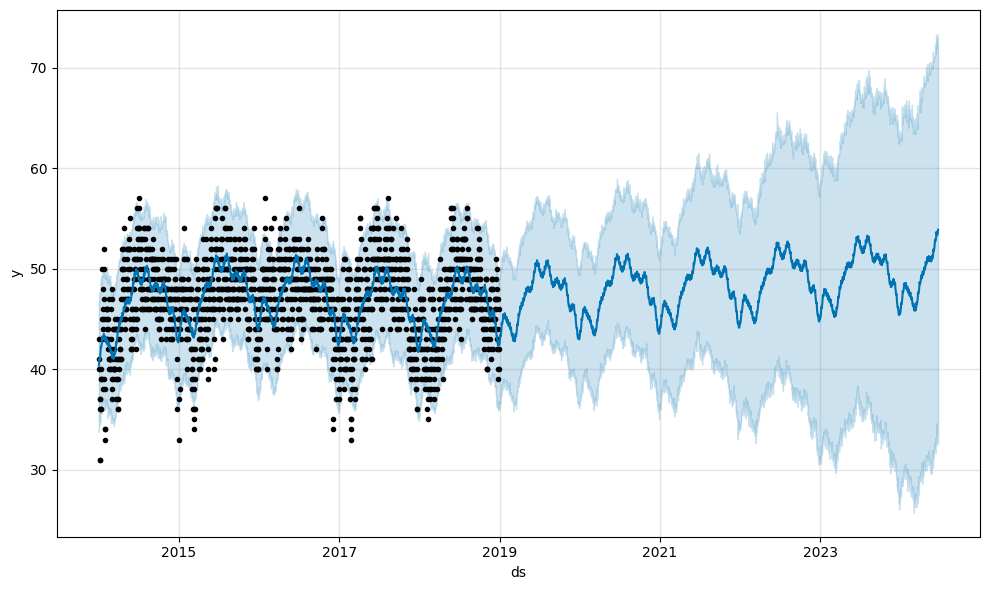

In [34]:
fig1 = model.plot(prediction)

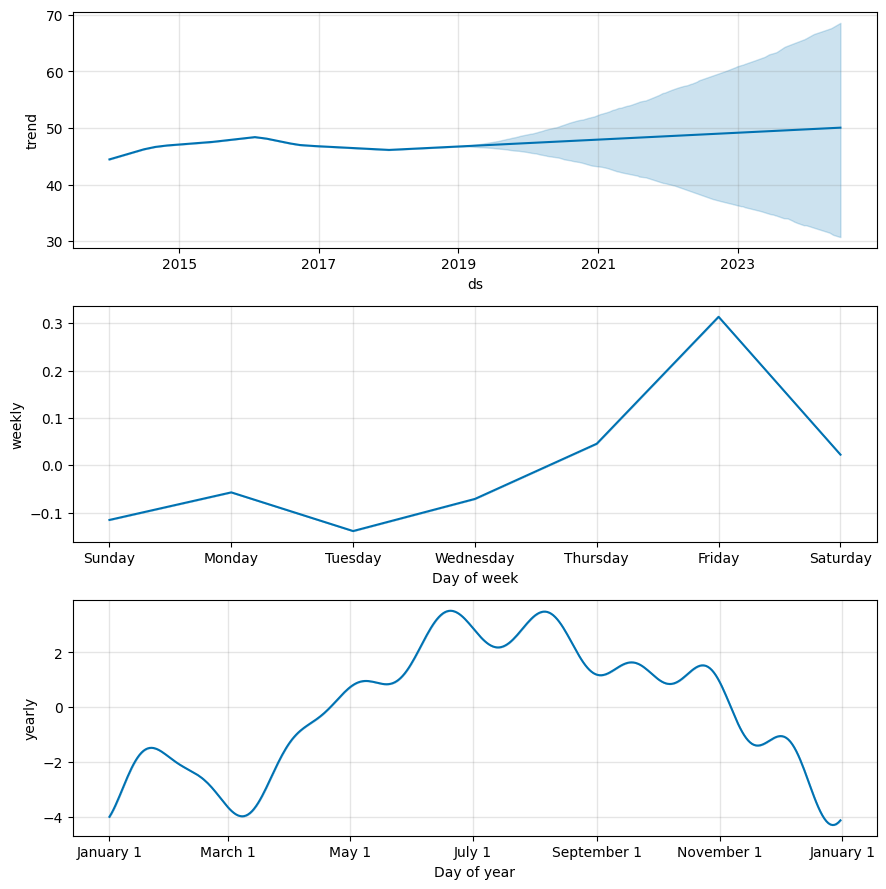

In [35]:
fig2 = model.plot_components(prediction)